<a href="https://colab.research.google.com/github/lenagrumbach/projeto_regressao_linear/blob/main/projeto_regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import re
pd.options.display.float_format = '{:,.2f}'.format

##Import Data

In [2]:
from google.colab import drive
 
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


##Exploratory Data Analysis (EDA)

In [3]:
df_diamonds = pd.read_csv('/drive/MyDrive/Diamantes/diamonds.csv')
display(df_diamonds)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.80,57.00,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.70,59.00,2757,5.69,5.73,3.58
48936,0.72,Ideal,D,SI1,60.80,57.00,2757,5.75,5.76,3.50
48937,0.72,Good,D,SI1,63.10,55.00,2757,5.69,5.75,3.61
48938,0.70,Very Good,D,SI1,62.80,60.00,2757,5.66,5.68,3.56


In [4]:
df_rick_diamonds = pd.read_csv('/drive/MyDrive/Diamantes/rick_diamonds.csv')
display(df_rick_diamonds)

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.40,57.00,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.30,61.00,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.80,56.00,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.30,56.00,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.60,57.00,8.44,8.37,5.18
...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.20,59.00,4.25,4.30,2.66
4996,0.51,Ideal,F,VVS2,61.90,56.00,5.09,5.14,3.16
4997,1.01,Very Good,F,SI1,60.60,60.00,6.37,6.43,3.88
4998,0.31,Ideal,F,VVS1,62.10,56.00,4.35,4.38,2.71


In [5]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    48940 non-null  float64
 1   cut      48940 non-null  object 
 2   color    48940 non-null  object 
 3   clarity  48940 non-null  object 
 4   depth    48940 non-null  float64
 5   table    48940 non-null  float64
 6   price    48940 non-null  int64  
 7   x        48940 non-null  float64
 8   y        48940 non-null  float64
 9   z        48940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.7+ MB


In [6]:
df_diamonds.describe()

,carat,depth,table,price,x,y,z
count,"48,940.00","48,940.00","48,940.00","48,940.00","48,940.00","48,940.00","48,940.00"
mean,0.80,61.75,57.45,"3,934.41",5.73,5.73,3.54
std,0.47,1.43,2.23,"3,989.33",1.12,1.15,0.71
min,0.20,43.00,43.00,326.00,0.00,0.00,0.00
25%,0.40,61.00,56.00,949.00,4.71,4.72,2.91
50%,0.70,61.80,57.00,"2,401.00",5.69,5.71,3.52
75%,1.04,62.50,59.00,"5,331.25",6.54,6.54,4.04
max,5.01,79.00,95.00,"18,823.00",10.74,58.90,31.80


  check the outliers in columns x, y and z.

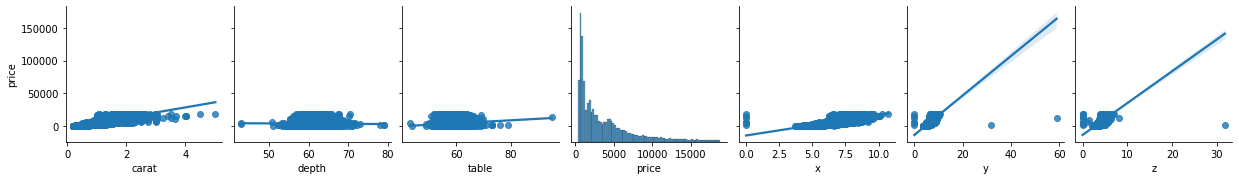

In [7]:
sns.pairplot(df_diamonds,kind='reg',y_vars='price', x_vars=['carat', 'depth', 'table', 'price', 'x', 'y', 'z'])

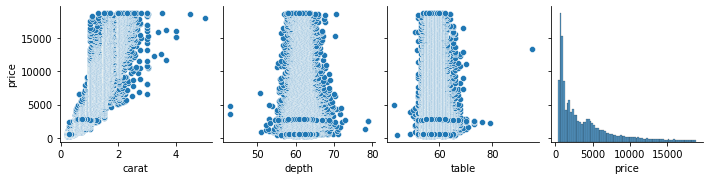

In [8]:
sns.pairplot(data = df_diamonds, y_vars='price', x_vars=['carat', 'depth', 'table', 'price'])

## Data Cleaning

**Create a new column to transform 'cut' into values ​​from 0 to 4**

Ideal=4, Premium=3, Very Good=2, Good=3, Fair=0

In [9]:
df_diamonds['cut_No'] = df_diamonds['cut'].replace('Ideal', 4, regex=False).replace('Premium', 3, regex=False).replace('Very Good', 2, regex=False).replace('Good', 1, regex=False).replace('Fair', 0, regex=False)

In [10]:
df_diamonds['cut_No'].unique()

array([3, 1, 2, 4, 0])

In [11]:
df_rick_diamonds['cut_No'] = df_rick_diamonds['cut'].replace('Ideal', 4, regex=False).replace('Premium', 3, regex=False).replace('Very Good', 2, regex=False).replace('Good', 1, regex=False).replace('Fair', 0, regex=False)

In [12]:
df_rick_diamonds['cut_No'].unique()

array([2, 1, 4, 3, 0])

 **Create a new column to transform 'color' into values ​​from 0 to 6**
  
  D=6, E=5, F=4, G=3, H=2, I=1, J=0

In [13]:
df_diamonds['color_No'] = df_diamonds['color'].replace('D', 6, regex=False).replace('E', 5, regex=False).replace('F', 4, regex=False).replace('G', 3, regex=False).replace('H', 2, regex=False).replace('I', 1, regex=False).replace('J', 0, regex=False)

In [14]:
df_diamonds['color_No'].unique()

array([5, 1, 0, 2, 4, 3, 6])

In [15]:
df_rick_diamonds['color_No'] = df_rick_diamonds['color'].replace('D', 6, regex=False).replace('E', 5, regex=False).replace('F', 4, regex=False).replace('G', 3, regex=False).replace('H', 2, regex=False).replace('I', 1, regex=False).replace('J', 0, regex=False)

In [16]:
df_rick_diamonds['color_No'].unique()

array([2, 4, 3, 0, 5, 1, 6])

**Create a new column to transform 'clarity' into values ​​from 0 to 7**

I1=0, SI2=1, SI1=2, VS2=3, VS1=4, VVS2=5, VVS1=6 e IF=7.

In [17]:
df_diamonds['clarity_No'] = df_diamonds['clarity'].replace('I1', 0, regex=False).replace('SI2', 1, regex=False).replace('SI1', 2, regex=False).replace('VS2', 3, regex=False).replace('VS1', 4, regex=False).replace('VVS2', 5, regex=False).replace('VVS1', 6, regex=False).replace('IF', 7, regex=False)

In [18]:
df_diamonds['clarity_No'].unique()

array([2, 4, 3, 1, 5, 6, 0, 7])

In [19]:
df_rick_diamonds['clarity_No'] = df_rick_diamonds['clarity'].replace('I1', 0, regex=False).replace('SI2', 1, regex=False).replace('SI1', 2, regex=False).replace('VS2', 3, regex=False).replace('VS1', 4, regex=False).replace('VVS2', 5, regex=False).replace('VVS1', 6, regex=False).replace('IF', 7, regex=False)

In [20]:
df_rick_diamonds['clarity_No'].unique()

array([1, 3, 4, 2, 7, 5, 0, 6])

**Check the columns with 'x', 'y' and 'z' with value 0.**

In [21]:
mask = ((df_diamonds['x']==0) | (df_diamonds['y']==0) | (df_diamonds['z']==0))

In [22]:
len(df_diamonds.loc[mask])

18

In [23]:
len(df_diamonds)

48940

In [24]:
len(df_diamonds.loc[mask])/len(df_diamonds)*100

0.03677973028197794

18 rows with issues represent just 0.037% of the data (18 out of 48940), so I will remove them.

In [25]:
df_diamonds = df_diamonds.loc[~mask]

In [26]:
mask_rick = ((df_rick_diamonds['x']==0) | (df_rick_diamonds['y']==0) | (df_rick_diamonds['z']==0))

In [27]:
df_rick_diamonds.loc[mask_rick]

,carat,cut,color,clarity,depth,table,x,y,z,cut_No,color_No,clarity_No
2427,1.12,Premium,G,I1,60.40,59.00,6.71,6.67,0.00,3,3,0
2460,0.71,Good,F,SI2,64.10,60.00,0.00,0.00,0.00,1,4,1


In [28]:
df_diamonds.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,"48,922.00",0.80,0.47,0.20,0.40,0.70,1.04,5.01
depth,"48,922.00",61.75,1.43,43.00,61.00,61.80,62.50,79.00
table,"48,922.00",57.45,2.23,43.00,56.00,57.00,59.00,95.00
price,"48,922.00","3,932.35","3,986.89",326.00,949.00,"2,400.00","5,331.00","18,823.00"
x,"48,922.00",5.73,1.12,3.73,4.71,5.69,6.54,10.74
y,"48,922.00",5.73,1.14,3.68,4.72,5.71,6.54,58.90
z,"48,922.00",3.54,0.70,1.07,2.91,3.52,4.04,31.80
cut_No,"48,922.00",2.91,1.12,0.00,2.00,3.00,4.00,4.00
color_No,"48,922.00",3.41,1.70,0.00,2.00,3.00,5.00,6.00
clarity_No,"48,922.00",3.06,1.65,0.00,2.00,3.00,4.00,7.00


##Regression Model

In [29]:
df_diamonds.corr()['price']

carat         0.92
depth        -0.01
table         0.13
price         1.00
x             0.89
y             0.87
z             0.87
cut_No       -0.06
color_No     -0.17
clarity_No   -0.15
Name: price, dtype: float64

In [30]:
X = df_diamonds[['carat','cut_No','color_No', 'clarity_No','x']]
y = df_diamonds['price']

In [31]:
modelo_diamonds = LinearRegression()

In [32]:
modelo_diamonds.fit(X,y)

LinearRegression()

In [33]:
modelo_diamonds.coef_

array([10726.35915222,   163.84727088,   326.07948959,   505.0883696 ,
        -845.46186814])

In [34]:
modelo_diamonds.intercept_

-2907.875911806353

In [35]:
predict = modelo_diamonds.predict(df_rick_diamonds[['carat','cut_No','color_No', 'clarity_No','x']])

In [36]:
df_rick_diamonds['price_predicted'] = predict
df_rick_diamonds

,carat,cut,color,clarity,depth,table,x,y,z,cut_No,color_No,clarity_No,price_predicted
0,0.91,Very Good,H,SI2,63.40,57.00,6.10,6.18,3.89,2,2,1,"3,180.74"
1,0.38,Good,F,VS2,60.30,61.00,4.68,4.71,2.83,1,4,3,194.81
2,0.52,Ideal,H,VS2,61.80,56.00,5.19,5.16,3.20,4,2,3,"1,104.70"
3,1.10,Ideal,G,VS1,61.30,56.00,6.65,6.69,4.09,4,3,4,"6,922.78"
4,2.28,Ideal,G,SI2,61.60,57.00,8.44,8.37,5.18,4,3,1,"16,551.24"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.20,59.00,4.25,4.30,2.66,2,6,1,-493.92
4996,0.51,Ideal,F,VVS2,61.90,56.00,5.09,5.14,3.16,4,4,5,"2,744.32"
4997,1.01,Very Good,F,SI1,60.60,60.00,6.37,6.43,3.88,2,4,2,"5,182.34"
4998,0.31,Ideal,F,VVS1,62.10,56.00,4.35,4.38,2.71,4,4,6,"1,729.77"


In [37]:
mask_neg_value = df_rick_diamonds['price_predicted'] < 0
df_rick_diamonds.loc[mask_neg_value,'price_predicted']=df_diamonds['price'].min()

##Save results

In [38]:
df_rick_diamonds.to_csv('diamonds_results.csv')

In [39]:
from google.colab import files
files.download('diamonds_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Version documentation

Prediction with historical average price, RMSE = 3980.713882502374

Prediction with historical price median, RMSE = 4255.533080942974

Prediction with simple linear regression model using the variable 'carat', RMSE = 1605.15175707362

Prediction with multiple linear regression model using variables 'carat' and 'cut_No', RMSE = 1578.5538450152076 (a negative value, -201.82, appeared in the column 'price_predicted')

Prediction with multiple linear regression model using variables 'carat' and 'cut_No', RMSE = 1563.1137434506852 (with correction of negatives in column 'price_predicted')

Prediction with multiple linear regression model using variables 'carat', 'cut_No' and 'color_No', RMSE = 1527.2229833293372

Prediction with multiple linear regression model using variables 'carat', 'cut_No', 'color_No' and 'clarity_No', RMSE = 1294.2985338102042 (a negative value, -827.59, appeared in the column 'price_predicted')

Prediction with multiple linear regression model using variables 'carat', 'cut_No', 'color_No' and 'clarity_No', RMSE = 1229.819225883019 (with correction of negatives in column 'price_predicted')

Results after drop rows with value 0 in columns 'x', 'y' or 'z' (less 18 rows):

Prediction with multiple linear regression model using variables 'carat', 'cut_No', 'color_No', 'clarity_No' and 'x', RMSE = 1245.6679614173986


